<a href="https://colab.research.google.com/github/NoahGal-19/Group8/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CleanedDataset.csv to CleanedDataset.csv


In [2]:
import pandas as pd
data = pd.read_csv('CleanedDataset.csv')

In [3]:
import statsmodels.api as sm
# Define dependent and independent variables
Y = data['Google_Trends_Interest']  # Dependent variable
X = data[['Household_Disposable_Income', 'Cocoa_Price']]  # Independent variables
X = sm.add_constant(X)  # Add an intercept term

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())



                              OLS Regression Results                              
Dep. Variable:     Google_Trends_Interest   R-squared:                       0.806
Model:                                OLS   Adj. R-squared:                  0.781
Method:                     Least Squares   F-statistic:                     33.18
Date:                    Wed, 08 Jan 2025   Prob (F-statistic):           2.03e-06
Time:                            16:05:26   Log-Likelihood:                -62.012
No. Observations:                      19   AIC:                             130.0
Df Residuals:                          16   BIC:                             132.9
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
# Extract and print key regression statistics
print("Regression Results:")
print("-------------------")
print(f"R-squared: {model.rsquared:.3f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
print(f"F-statistic: {model.fvalue:.2f}")
print(f"Prob (F-statistic): {model.f_pvalue:.3e}")
print("\nCoefficients:")
print(model.params)  # Coefficients for each variable
print("\nP-values:")
print(model.pvalues)  # P-values for each variable
print("\nStandard Errors:")
print(model.bse)  # Standard errors for each coefficient


Regression Results:
-------------------
R-squared: 0.806
Adjusted R-squared: 0.781
F-statistic: 33.18
Prob (F-statistic): 2.028e-06

Coefficients:
const                         -33.989369
Household_Disposable_Income     0.001615
Cocoa_Price                     0.000387
dtype: float64

P-values:
const                          5.223191e-03
Household_Disposable_Income    5.658284e-07
Cocoa_Price                    9.044321e-01
dtype: float64

Standard Errors:
const                          10.519002
Household_Disposable_Income     0.000202
Cocoa_Price                     0.003169
dtype: float64


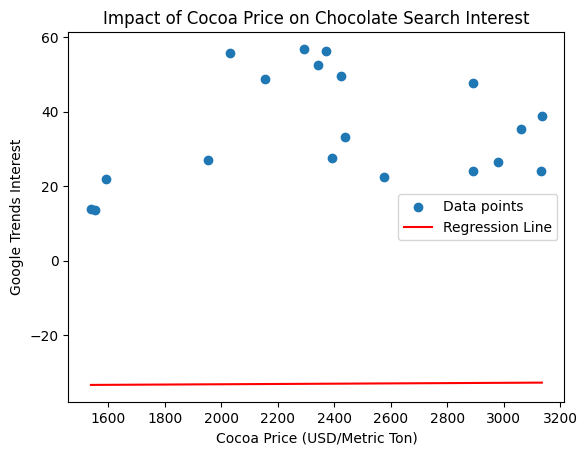

In [5]:
# Let's plot: Cocoa Price vs. Google Trends Interest
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(data['Cocoa_Price'], data['Google_Trends_Interest'], label="Data points")
plt.xlabel('Cocoa Price (USD/Metric Ton)')
plt.ylabel('Google Trends Interest')
plt.title('Impact of Cocoa Price on Chocolate Search Interest')

# Regression line
slope = model.params['Cocoa_Price']
intercept = model.params['const']
x_vals = np.linspace(data['Cocoa_Price'].min(), data['Cocoa_Price'].max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label="Regression Line")

plt.legend()
plt.show()


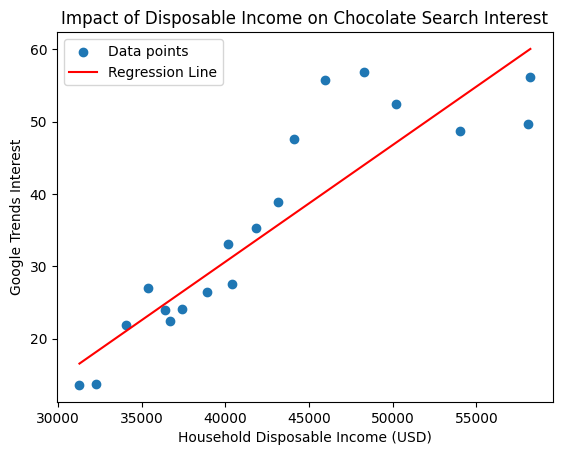

In [6]:
# Now let's plot: Household Disposable Income vs. Google Trends Interest
plt.scatter(data['Household_Disposable_Income'], data['Google_Trends_Interest'], label="Data points")
plt.xlabel('Household Disposable Income (USD)')
plt.ylabel('Google Trends Interest')
plt.title('Impact of Disposable Income on Chocolate Search Interest')

# Regression line
slope = model.params['Household_Disposable_Income']
intercept = model.params['const']
x_vals = np.linspace(data['Household_Disposable_Income'].min(), data['Household_Disposable_Income'].max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label="Regression Line")

plt.legend()
plt.show()